# **Clustering, assigning weights and DS values, and final demand, FCS, SCS subission**

## Using DBSCAN (unsupervised) to form clusters with similar forecasted demand

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
demand = pd.read_csv(r'/content/drive/MyDrive/Shell_Hack/Demand_History.csv')
infra = pd.read_csv(r'/content/drive/MyDrive/Shell_Hack/exisiting_EV_infrastructure_2018.csv')

In [12]:
forecast = pd.read_csv(r'/content/drive/MyDrive/Shell_Hack/forecast.csv')
f = forecast.T
f

f = f.rename(columns=f.iloc[0])
f = f.drop('Unnamed: 0')
f

,2019-01-01,2020-01-01
0,14.461672,16.07643
1,13.54457,15.008616
2,15.268517,17.066799
3,16.667323,18.601011
4,17.772011,19.87989
...,...,...
4091,5.932496,6.603637
4092,2.193595,2.449776
4093,3.482969,3.876891
4094,7.110299,7.87482


In [13]:
f_year19 = f['2019-01-01']
print(f_year19.max())
print(f_year19.min())
f_year19= pd.DataFrame(f_year19)

359.25599854184304
0.0


In [14]:
f_year20 = f['2020-01-01']
print(f_year20.max())
print(f_year20.min())
f_year20= pd.DataFrame(f_year20)

399.0245165466723
0.0


In [15]:
zero_demand20 = f_year20.loc[f_year20['2020-01-01'] == 0]
zero_demand20.index

Index(['97', '108', '172', '173', '174', '238', '417', '511', '595', '690',
       '786', '795', '819', '1203', '1268', '1353', '1417', '1514', '1515',
       '1580', '1998', '2120', '2806', '3076', '3150', '3331', '3395', '3458',
       '3459', '3845'],
      dtype='object')

In [16]:
from scipy.spatial import distance_matrix

d_mat = pd.DataFrame(distance_matrix(f_year19.values, f_year19.values), index=f_year19.index, columns=f_year19.index)
d_mat

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0.000000,0.917102,0.806845,2.205651,3.310339,5.100649,6.765303,6.749614,9.651663,9.569614,...,7.013152,10.648024,11.662295,9.934858,5.521642,8.529176,12.268077,10.978703,7.351373,6.781241
1,0.917102,0.000000,1.723947,3.122753,4.227441,6.017751,7.682405,7.666716,10.568765,10.486717,...,6.096050,9.730922,10.745193,9.017756,4.604540,7.612074,11.350975,10.061601,6.434271,5.864139
2,0.806845,1.723947,0.000000,1.398806,2.503493,4.293804,5.958458,5.942769,8.844818,8.762769,...,7.819997,11.454870,12.469140,10.741704,6.328488,9.336021,13.074922,11.785548,8.158218,7.588086
3,2.205651,3.122753,1.398806,0.000000,1.104687,2.894998,4.559652,4.543963,7.446012,7.363963,...,9.218803,12.853676,13.867946,12.140509,7.727293,10.734827,14.473728,13.184354,9.557024,8.986892
4,3.310339,4.227441,2.503493,1.104687,0.000000,1.790310,3.454965,3.439275,6.341324,6.259276,...,10.323491,13.958363,14.972633,13.245197,8.831981,11.839515,15.578415,14.289042,10.661712,10.091579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4091,8.529176,7.612074,9.336021,10.734827,11.839515,13.629825,15.294479,15.278790,18.180839,18.098790,...,1.516024,2.118848,3.133119,1.405682,3.007534,0.000000,3.738901,2.449527,1.177803,1.747935
4092,12.268077,11.350975,13.074922,14.473728,15.578415,17.368726,19.033380,19.017691,21.919740,21.837691,...,5.254925,1.620052,0.605782,2.333219,6.746434,3.738901,0.000000,1.289374,4.916704,5.486836
4093,10.978703,10.061601,11.785548,13.184354,14.289042,16.079352,17.744006,17.728317,20.630366,20.548317,...,3.965551,0.330679,0.683592,1.043845,5.457061,2.449527,1.289374,0.000000,3.627330,4.197462
4094,7.351373,6.434271,8.158218,9.557024,10.661712,12.452022,14.116676,14.100987,17.003036,16.920987,...,0.338221,3.296651,4.310922,2.583485,1.829731,1.177803,4.916704,3.627330,0.000000,0.570132


In [17]:
#distance matrix for 2020
d_mat20 = pd.DataFrame(distance_matrix(f_year20.values, f_year20.values), index=f_year20.index, columns=f_year20.index)
d_mat20

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0.000000,1.067814,0.990368,2.524581,3.803459,5.815598,7.670077,7.608706,10.812987,10.820608,...,7.812023,11.803462,12.947057,11.057766,6.161722,9.472793,13.626654,12.199540,8.201610,7.578164
1,1.067814,0.000000,2.058182,3.592395,4.871273,6.883412,8.737892,8.676520,11.880801,11.888422,...,6.744209,10.735648,11.879243,9.989952,5.093908,8.404979,12.558840,11.131726,7.133796,6.510349
2,0.990368,2.058182,0.000000,1.534213,2.813091,4.825230,6.679709,6.618338,9.822619,9.830240,...,8.802391,12.793831,13.937425,12.048134,7.152091,10.463161,14.617022,13.189908,9.191979,8.568532
3,2.524581,3.592395,1.534213,0.000000,1.278878,3.291017,5.145497,5.084125,8.288406,8.296027,...,10.336604,14.328043,15.471638,13.582347,8.686303,11.997374,16.151235,14.724121,10.726191,10.102745
4,3.803459,4.871273,2.813091,1.278878,0.000000,2.012139,3.866618,3.805246,7.009528,7.017149,...,11.615482,15.606922,16.750516,14.861225,9.965182,13.276253,17.430113,16.002999,12.005070,11.381623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4091,9.472793,8.404979,10.463161,11.997374,13.276253,15.288392,17.142871,17.081499,20.285780,20.293401,...,1.660770,2.330669,3.474264,1.584973,3.311071,0.000000,4.153861,2.726747,1.271183,1.894630
4092,13.626654,12.558840,14.617022,16.151235,17.430113,19.442252,21.296732,21.235360,24.439641,24.447262,...,5.814631,1.823192,0.679597,2.568888,7.464932,4.153861,0.000000,1.427114,5.425044,6.048491
4093,12.199540,11.131726,13.189908,14.724121,16.002999,18.015138,19.869617,19.808245,23.012527,23.020148,...,4.387517,0.396077,0.747517,1.141774,6.037817,2.726747,1.427114,0.000000,3.997929,4.621376
4094,8.201610,7.133796,9.191979,10.726191,12.005070,14.017209,15.871688,15.810316,19.014598,19.022218,...,0.389587,3.601852,4.745447,2.856155,2.039888,1.271183,5.425044,3.997929,0.000000,0.623447


In [18]:
from sklearn.cluster import DBSCAN
clusters = DBSCAN(eps=67, min_samples=7).fit(d_mat)
# get cluster labels
clusters.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [19]:
clusters20 = DBSCAN(eps=67, min_samples=7).fit(d_mat20)
# get cluster labels
clusters20.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [20]:

clust = np.zeros((4096,2))
for i in range(4096):                       #making 3,4,5 to -1
  clust[i][0] = i                           #making 6 to 2
  clust[i][1] = clusters.labels_[i]

for i in range(4096):
  if (clust[i][1] == 4) | (clust[i][1] == 5) | (clust[i][1] ==3):
    clust[i][1] = -1
  if clust[i][1] == 6:
    clust[i][1] = 2
c = pd.DataFrame(clust)
c

,0,1
0,0.0,0.0
1,1.0,0.0
2,2.0,0.0
3,3.0,0.0
4,4.0,1.0
...,...,...
4091,4091.0,0.0
4092,4092.0,0.0
4093,4093.0,0.0
4094,4094.0,0.0


Text(0.5, 1.0, '2019')

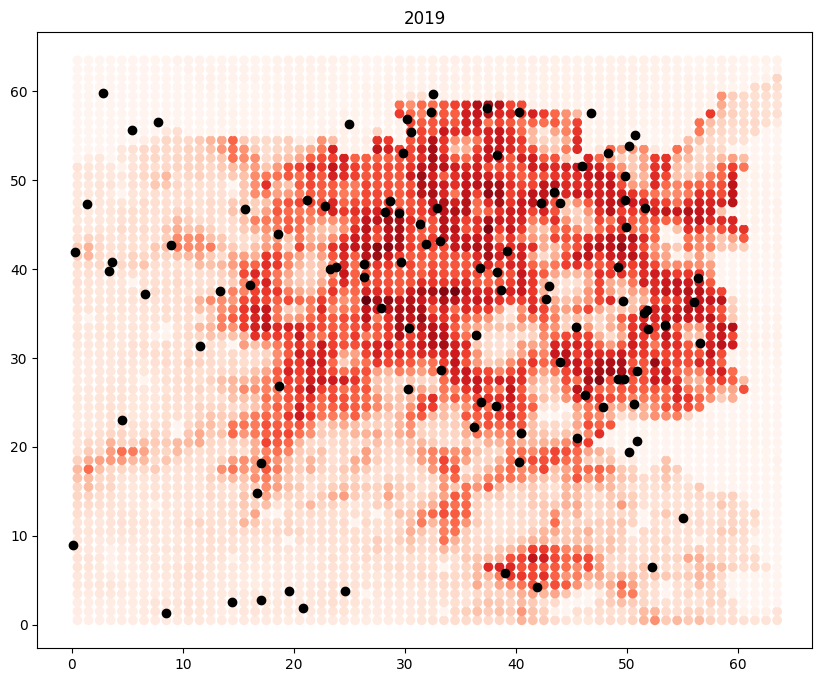

In [22]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(x = demand['x_coordinate'], y = demand['y_coordinate'], cmap="Reds", c=f_year19["2019-01-01"]) #blue
ax.scatter(x = infra['x_coordinate'], y = infra['y_coordinate'], color = 'black')  #orange
plt.title("2019")

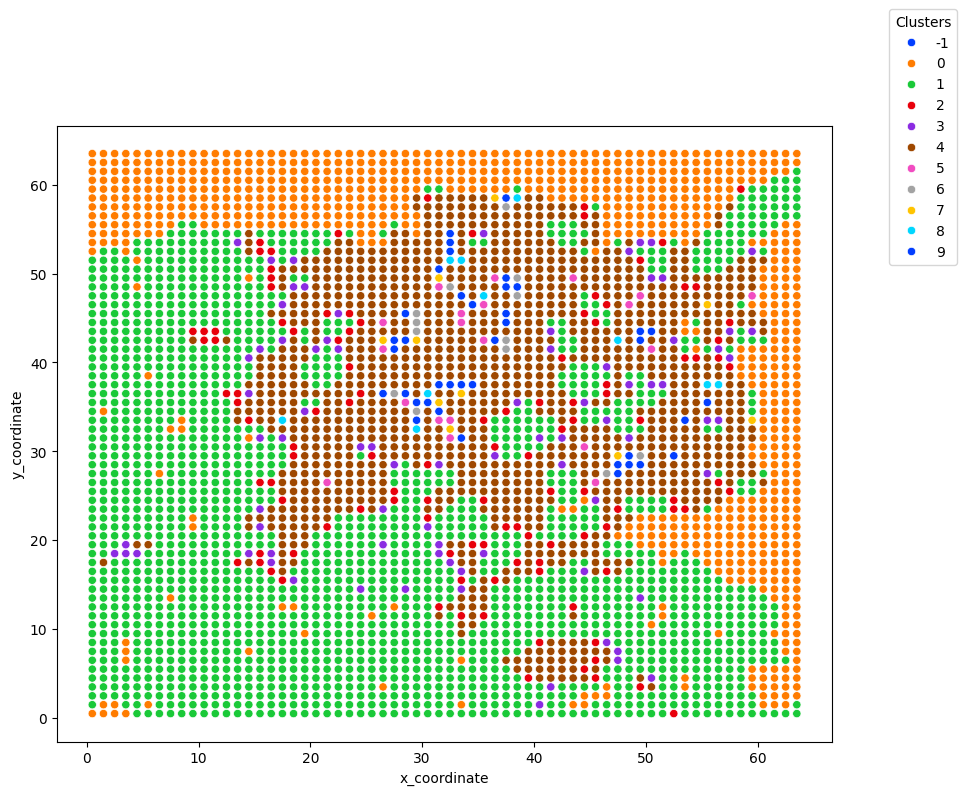

In [23]:
#2019
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
p = sns.scatterplot(data=f_year19, x=demand['x_coordinate'], y=demand['y_coordinate'], hue=clusters.labels_, legend="full", palette="bright")
sns.move_legend(p, "upper right", bbox_to_anchor=(1.17, 1.2), title='Clusters')

plt.show()
#blue (-1), purple(3), pink-brown(5) ,red-grey(2), green(1), orange (0)
#35            35        30            30           20         15

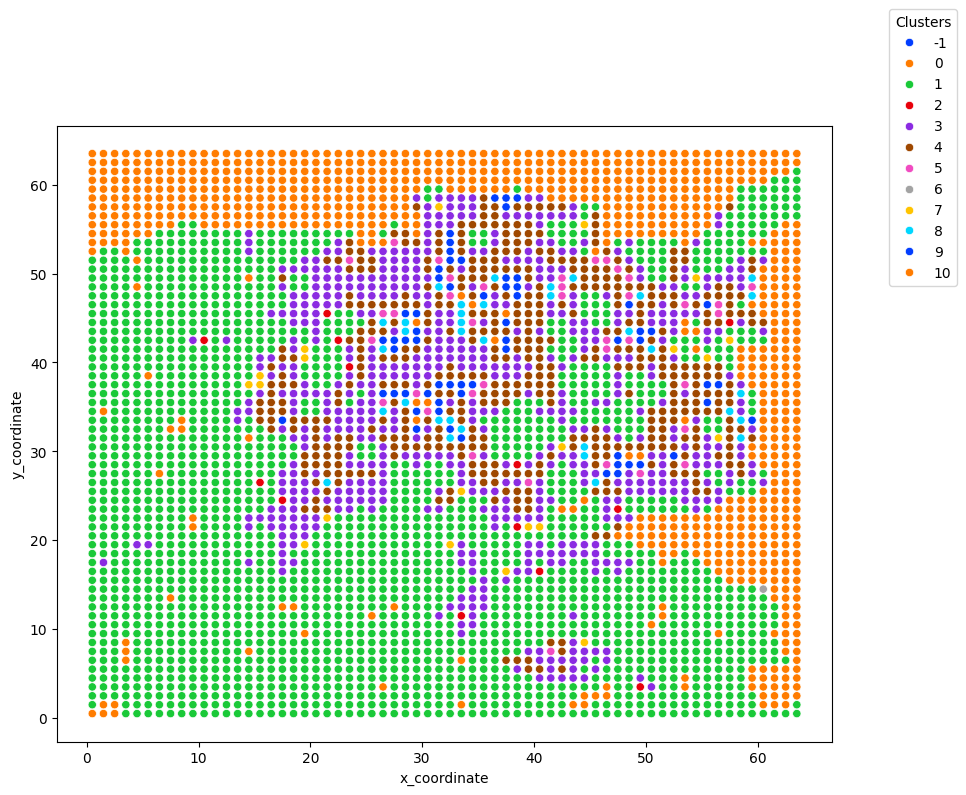

In [24]:
#2020
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
p = sns.scatterplot(data=f_year20, x=demand['x_coordinate'], y=demand['y_coordinate'], hue=clusters20.labels_, legend="full", palette="bright")
sns.move_legend(p, "upper right", bbox_to_anchor=(1.17, 1.2), title='Clusters')
plt.show()

## Assigning weights to demand points for creating the DS matrix

We decided to consider that few of the nearest demand points to a supply point will influence the demand at that supply point, based on the clustering. So, the sum of the distance-based fractional demand (the DS value of that supply point wrt) of all the demand points that influence the demand at that supply point will be the total demand (charging need) at that supply point.

In [25]:
idx_vals = np.empty((25,4096))  #1
idx_vals.fill(-1)
idx_vals

array([[-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       ...,
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.]])

In [26]:
matrix = pd.read_csv(r'/content/drive/MyDrive/Shell_Hack/distance_matrix.csv')
matrix

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,68.575124,67.575124,66.575124,65.575124,64.575124,63.575124,62.575124,61.575124,60.575124,59.575124,...,48.424876,49.424876,50.424876,51.424876,52.424876,53.424876,54.424876,55.424876,56.424876,57.424876
1,94.455675,93.455675,92.455675,91.455675,90.455675,89.455675,88.455675,87.455675,86.455675,85.455675,...,22.544325,23.544325,24.544325,25.544325,26.544325,27.544325,28.544325,29.544325,30.544325,31.544325
2,103.234882,102.234882,101.234882,100.234882,99.234882,98.234882,97.234882,96.234882,95.234882,94.234882,...,13.765118,14.765118,15.765118,16.765118,17.765118,18.765118,19.765118,20.765118,21.765118,22.765118
3,84.908461,83.908461,82.908461,81.908461,80.908461,79.908461,78.908461,77.908461,76.908461,75.908461,...,32.091539,33.091539,34.091539,35.091539,36.091539,37.091539,38.091539,39.091539,40.091539,41.091539
4,85.638536,84.638536,83.638536,82.638536,81.638536,80.638536,79.638536,78.638536,77.638536,76.638536,...,31.361464,32.361464,33.361464,34.361464,35.361464,36.361464,37.361464,38.361464,39.361464,40.361464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,65.470618,64.470618,63.470618,62.470618,61.470618,60.470618,59.470618,58.470618,57.470618,56.470618,...,51.529382,52.529382,53.529382,54.529382,55.529382,56.529382,57.529382,58.529382,59.529382,60.529382
96,62.706731,61.706731,60.706731,59.706731,58.706731,57.706731,56.706731,55.706731,54.706731,53.706731,...,54.293269,55.293269,56.293269,57.293269,58.293269,59.293269,60.293269,61.293269,62.293269,63.293269
97,57.454604,56.454604,55.454604,54.454604,53.454604,52.454604,51.454604,50.454604,49.454604,48.454604,...,59.545396,60.545396,61.545396,62.545396,63.545396,64.545396,65.545396,66.545396,67.545396,68.545396
98,80.059357,79.059357,78.059357,77.059357,76.059357,75.059357,74.059357,73.059357,72.059357,71.059357,...,36.940643,37.940643,38.940643,39.940643,40.940643,41.940643,42.940643,43.940643,44.940643,45.940643


In [27]:
cols = list(matrix.columns.astype('str'))
#cols

In [28]:
for i in range(4096):
  if(c.iloc[i,1] == -1):
    matrix.sort_values(cols[i],axis=0, ascending=True, inplace=True)
    idx_vals[:,i] = matrix.index[0:25]
                                                                #2
  if(c.iloc[i,1] == 2):
    matrix.sort_values(cols[i],axis=0, ascending=True, inplace=True)
    idx_vals[:,i] = matrix.index[0:25]
  if(c.iloc[i,1] == 1):
    matrix.sort_values(cols[i],axis=0, ascending=True, inplace=True)     #22 and 12
    idx_vals[:,i] = matrix.index[0:25]
  if(c.iloc[i,1] == 0):
    matrix.sort_values(cols[i],axis=0, ascending=True, inplace=True)
    idx_vals[:,i] = matrix.index[0:25]

idx_vals

array([[38., 38., 38., ..., 16., 16., 16.],
       [88., 88., 88., ...,  2.,  2.,  2.],
       [24., 24., 24., ..., 21., 21., 21.],
       ...,
       [50., 50., 50., ..., 73., 73., 73.],
       [97., 97., 97., ..., 52., 52., 52.],
       [69., 69., 69., ...,  4.,  4.,  4.]])

In [29]:
weights =  matrix.sort_index()
weights

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,68.575124,67.575124,66.575124,65.575124,64.575124,63.575124,62.575124,61.575124,60.575124,59.575124,...,48.424876,49.424876,50.424876,51.424876,52.424876,53.424876,54.424876,55.424876,56.424876,57.424876
1,94.455675,93.455675,92.455675,91.455675,90.455675,89.455675,88.455675,87.455675,86.455675,85.455675,...,22.544325,23.544325,24.544325,25.544325,26.544325,27.544325,28.544325,29.544325,30.544325,31.544325
2,103.234882,102.234882,101.234882,100.234882,99.234882,98.234882,97.234882,96.234882,95.234882,94.234882,...,13.765118,14.765118,15.765118,16.765118,17.765118,18.765118,19.765118,20.765118,21.765118,22.765118
3,84.908461,83.908461,82.908461,81.908461,80.908461,79.908461,78.908461,77.908461,76.908461,75.908461,...,32.091539,33.091539,34.091539,35.091539,36.091539,37.091539,38.091539,39.091539,40.091539,41.091539
4,85.638536,84.638536,83.638536,82.638536,81.638536,80.638536,79.638536,78.638536,77.638536,76.638536,...,31.361464,32.361464,33.361464,34.361464,35.361464,36.361464,37.361464,38.361464,39.361464,40.361464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,65.470618,64.470618,63.470618,62.470618,61.470618,60.470618,59.470618,58.470618,57.470618,56.470618,...,51.529382,52.529382,53.529382,54.529382,55.529382,56.529382,57.529382,58.529382,59.529382,60.529382
96,62.706731,61.706731,60.706731,59.706731,58.706731,57.706731,56.706731,55.706731,54.706731,53.706731,...,54.293269,55.293269,56.293269,57.293269,58.293269,59.293269,60.293269,61.293269,62.293269,63.293269
97,57.454604,56.454604,55.454604,54.454604,53.454604,52.454604,51.454604,50.454604,49.454604,48.454604,...,59.545396,60.545396,61.545396,62.545396,63.545396,64.545396,65.545396,66.545396,67.545396,68.545396
98,80.059357,79.059357,78.059357,77.059357,76.059357,75.059357,74.059357,73.059357,72.059357,71.059357,...,36.940643,37.940643,38.940643,39.940643,40.940643,41.940643,42.940643,43.940643,44.940643,45.940643


In [30]:
matrix2 = weights
matrix2.sort_index(inplace=True)              #3
for i in range(4096):
  s = list(matrix2[cols[i]])
  s.sort()
  matrix2[cols[i]] = s
weights = matrix2.head(25)

In [31]:
weights

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,8.778140,7.778140,6.778140,5.778140,4.778140,3.778140,2.778140,1.778140,0.852212,1.852212,...,12.163108,13.163108,14.163108,15.163108,16.163108,17.163108,18.163108,19.163108,20.163108,21.163108
1,8.943741,9.943741,10.943741,11.943741,12.006252,11.006252,10.006252,9.006252,8.006252,7.006252,...,13.765118,14.765118,15.765118,16.765118,17.765118,18.765118,19.765118,20.765118,21.765118,22.765118
2,16.006252,15.006252,14.006252,13.006252,12.943741,13.819475,12.819475,11.819475,10.819475,9.819475,...,13.904007,14.904007,15.904007,16.904007,17.904007,18.904007,19.904007,20.904007,21.904007,22.904007
3,18.819475,17.819475,16.819475,15.819475,14.819475,13.943741,14.943741,14.654245,13.654245,12.654245,...,16.613356,17.613356,18.613356,19.613356,20.613356,21.613356,22.613356,23.613356,24.613356,25.613356
4,21.654245,20.654245,19.654245,18.654245,17.654245,16.654245,15.654245,15.420547,14.420547,13.420547,...,17.729428,18.729428,19.729428,20.729428,21.729428,22.729428,23.729428,24.729428,25.729428,26.729428
5,22.420547,21.420547,20.420547,19.420547,18.420547,17.420547,16.420547,15.943741,16.943741,17.943741,...,19.528729,20.528729,21.528729,22.528729,23.528729,24.528729,25.528729,26.528729,27.528729,28.528729
6,26.493298,25.493298,24.493298,23.493298,22.493298,22.369449,21.369449,20.369449,19.369449,18.369449,...,20.092850,21.092850,22.092850,23.092850,24.092850,25.092850,26.092850,27.092850,28.092850,29.092850
7,27.369449,26.369449,25.369449,24.369449,23.369449,23.491126,24.491126,23.537655,22.537655,21.537655,...,20.342420,21.342420,22.342420,23.342420,24.342420,25.342420,26.342420,27.342420,28.342420,29.342420
8,30.537655,29.537655,28.537655,27.537655,26.537655,25.537655,24.537655,25.491126,26.246167,25.246167,...,20.388030,21.388030,22.388030,23.388030,24.388030,25.388030,26.388030,27.388030,28.388030,29.388030
9,34.246167,33.246167,32.246167,31.246167,30.246167,29.246167,28.246167,27.246167,26.491126,27.491126,...,22.544325,23.544325,24.544325,25.544325,26.544325,27.544325,28.544325,29.544325,30.544325,31.544325


In [32]:
idx_matrix = pd.DataFrame(idx_vals)
#idx_matrix

In [33]:
for i in range(25):
  for j in range(4096):

    ind = int(idx_matrix.iloc[i,j])
    park = infra.iloc[ind, 3]
    weights.iloc[i,j] = park / weights.iloc[i,j]              #4


weights2 = weights

In [34]:
weights

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,2.278387,2.571309,2.950662,3.461322,4.185730,5.293611,7.199062,11.247711,23.468343,10.797901,...,1.068806,0.987609,0.917878,0.857344,0.804301,0.757439,0.715737,0.678387,0.644742,0.614276
1,1.900771,1.709618,1.553399,1.423340,1.665799,1.817149,1.998750,2.220680,2.498048,2.854593,...,2.252069,2.099543,1.966367,1.849077,1.744993,1.652001,1.568420,1.492888,1.424297,1.361732
2,1.249512,1.332778,1.427934,1.537722,1.313376,1.230148,1.326107,1.438304,1.571241,1.731253,...,2.013808,1.878689,1.760563,1.656412,1.563896,1.481167,1.406752,1.339456,1.278305,1.222494
3,0.903320,0.954012,1.010733,1.074625,1.147139,1.219185,1.137600,0.682396,0.732373,0.790249,...,1.083466,1.021952,0.967048,0.917742,0.873220,0.832818,0.795990,0.762280,0.731310,0.702758
4,0.461803,0.484162,0.508796,0.536071,0.566436,0.600448,0.638804,1.556365,1.664292,1.788303,...,1.184471,1.121230,1.064400,1.013053,0.966431,0.923912,0.884977,0.849191,0.816186,0.785651
5,1.070447,1.120420,1.175287,1.235805,1.302893,1.377684,1.461583,1.066249,1.003320,0.947406,...,1.792231,1.704928,1.625735,1.553572,1.487543,1.426898,1.371004,1.319324,1.271399,1.226833
6,0.717163,0.745294,0.775722,0.808741,0.844696,0.491742,0.514754,0.540024,0.567905,0.598820,...,1.194455,1.137826,1.086324,1.039283,0.996146,0.956448,0.919792,0.885843,0.854310,0.824945
7,0.401908,0.417149,0.433592,0.451385,0.470700,0.808816,0.775791,0.594792,0.621183,0.650024,...,1.523909,1.452506,1.387495,1.328054,1.273497,1.223245,1.176809,1.133769,1.093767,1.056491
8,0.458450,0.473971,0.490580,0.508395,0.527552,0.548210,0.570552,0.745357,0.990621,1.029859,...,0.980968,0.935102,0.893335,0.855138,0.820074,0.787773,0.757919,0.730246,0.704522,0.680549
9,0.759209,0.782045,0.806297,0.832102,0.859613,0.889005,0.920479,0.954263,0.717221,0.691132,...,1.197641,1.146773,1.100051,1.056986,1.017167,0.980238,0.945897,0.913881,0.883961,0.855938


In [35]:
for i in range(4096):
  sum = weights[cols[i]].sum()      #6
  for j in range(25):
    weights.iloc[j,i] = weights.iloc[j,i] / sum

weights

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0.139017,0.152260,0.168241,0.188248,0.214761,0.252379,0.306876,0.401196,0.573767,0.372155,...,0.035102,0.034167,0.032984,0.032123,0.031365,0.030690,0.030085,0.029539,0.029045,0.028594
1,0.115976,0.101235,0.088572,0.077410,0.085469,0.086635,0.085201,0.079210,0.061074,0.098385,...,0.073962,0.072635,0.070661,0.069280,0.068048,0.066936,0.065926,0.065006,0.064163,0.063388
2,0.076240,0.078920,0.081418,0.083631,0.067386,0.058649,0.056528,0.051303,0.038415,0.059669,...,0.066137,0.064995,0.063265,0.062062,0.060986,0.060014,0.059131,0.058325,0.057586,0.056907
3,0.055116,0.056492,0.057630,0.058445,0.058857,0.058126,0.048493,0.024340,0.017905,0.027236,...,0.035583,0.035355,0.034751,0.034386,0.034052,0.033744,0.033458,0.033192,0.032945,0.032713
4,0.028177,0.028670,0.029011,0.029155,0.029063,0.028627,0.027230,0.055514,0.040690,0.061635,...,0.038900,0.038790,0.038249,0.037957,0.037687,0.037435,0.037199,0.036977,0.036768,0.036572
5,0.065314,0.066346,0.067013,0.067211,0.066849,0.065683,0.062303,0.038032,0.024530,0.032653,...,0.058860,0.058983,0.058420,0.058209,0.058009,0.057815,0.057628,0.057448,0.057275,0.057109
6,0.043758,0.044133,0.044230,0.043984,0.043340,0.023444,0.021942,0.019262,0.013884,0.020639,...,0.039228,0.039364,0.039037,0.038939,0.038846,0.038753,0.038662,0.038573,0.038486,0.038401
7,0.024523,0.024701,0.024723,0.024549,0.024151,0.038561,0.033070,0.021216,0.015187,0.022403,...,0.050048,0.050251,0.049859,0.049759,0.049662,0.049564,0.049465,0.049368,0.049273,0.049179
8,0.027973,0.028066,0.027972,0.027650,0.027068,0.026137,0.024321,0.026586,0.024219,0.035495,...,0.032217,0.032351,0.032102,0.032040,0.031980,0.031919,0.031858,0.031798,0.031738,0.031679
9,0.046324,0.046309,0.045974,0.045255,0.044105,0.042384,0.039237,0.034038,0.017535,0.023820,...,0.039333,0.039673,0.039530,0.039603,0.039666,0.039717,0.039759,0.039794,0.039821,0.039844


In [36]:
frac_weight2019 = weights.copy(deep=True)
frac_weight2020 = weights.copy(deep=True)

forecast = pd.read_csv(r'/content/drive/MyDrive/Shell_Hack/forecast.csv')         #6
forecast.drop("Unnamed: 0",axis=1,inplace=True)

for i in range(4096):
  ds = forecast.iloc[0,i]
  for j in range(25):
    frac_weight2019.iloc[j,i] = frac_weight2019.iloc[j,i]*ds

frac_weight2019

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,2.010417,2.062295,2.568794,3.137583,3.816730,4.937122,6.514041,8.509886,13.835428,8.943372,...,0.261455,0.130301,0.092334,0.145413,0.280402,0.182068,0.065994,0.102885,0.206518,0.219618
1,1.677214,1.371184,1.352362,1.290214,1.518948,1.694777,1.808561,1.680140,1.472689,2.364320,...,0.550910,0.277005,0.197806,0.313620,0.608355,0.397097,0.144615,0.226413,0.456217,0.486850
2,1.102552,1.068942,1.243134,1.393898,1.197593,1.147306,1.199923,1.088204,0.926303,1.433912,...,0.492625,0.247867,0.177103,0.280942,0.545219,0.356033,0.129709,0.203143,0.409454,0.437069
3,0.797077,0.765157,0.879926,0.974115,1.046011,1.137081,1.029353,0.516293,0.431760,0.654524,...,0.265041,0.134832,0.097280,0.155657,0.304430,0.200187,0.073394,0.115608,0.234246,0.251252
4,0.407489,0.388318,0.442949,0.485932,0.516501,0.560011,0.578019,1.177527,0.981160,1.481163,...,0.289750,0.147931,0.107073,0.171823,0.336926,0.222084,0.081599,0.128789,0.261433,0.280888
5,0.944547,0.898622,1.023184,1.120219,1.188034,1.284906,1.322508,0.806712,0.591493,0.784690,...,0.438422,0.224941,0.163540,0.263499,0.518600,0.342988,0.126413,0.200090,0.407242,0.438621
6,0.632814,0.597756,0.675330,0.733099,0.770230,0.458627,0.465773,0.408576,0.334800,0.495974,...,0.292192,0.150120,0.109279,0.176271,0.347285,0.229904,0.084809,0.134348,0.273644,0.294936
7,0.354638,0.334571,0.377478,0.409167,0.429205,0.754348,0.701971,0.450012,0.366209,0.538383,...,0.372784,0.191638,0.139575,0.225250,0.443978,0.294035,0.108507,0.171948,0.350345,0.377719
8,0.404530,0.380144,0.427090,0.460844,0.481045,0.511292,0.516261,0.563929,0.584006,0.852982,...,0.239968,0.123374,0.089865,0.145039,0.285902,0.189359,0.069884,0.110750,0.225666,0.243312
9,0.669916,0.627232,0.701948,0.754275,0.783832,0.829137,0.832891,0.721984,0.422828,0.572431,...,0.292971,0.151301,0.110659,0.179274,0.354614,0.235623,0.087216,0.138600,0.283142,0.306017


In [37]:
for i in range(4096):
  ds = forecast.iloc[1,i]         #7
  for j in range(25):
    frac_weight2020.iloc[j,i] = frac_weight2020.iloc[j,i]*ds

frac_weight2020

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,2.234896,2.285210,2.871339,3.501595,4.269419,5.525092,7.287224,9.502385,15.428252,10.009877,...,0.290094,0.145995,0.103218,0.161213,0.310973,0.202665,0.073701,0.114521,0.228723,0.243003
1,1.864488,1.519396,1.511639,1.439901,1.699105,1.896610,2.023228,1.876093,1.642234,2.646267,...,0.611254,0.310368,0.221124,0.347695,0.674680,0.442020,0.161504,0.252020,0.505271,0.538691
2,1.225660,1.184485,1.389547,1.555614,1.339636,1.283941,1.342347,1.215120,1.032945,1.604908,...,0.546586,0.277720,0.197981,0.311467,0.604661,0.396311,0.144857,0.226118,0.453480,0.483609
3,0.886077,0.847863,0.983561,1.087128,1.170075,1.272498,1.151531,0.576508,0.481467,0.732577,...,0.294073,0.151071,0.108747,0.172570,0.337620,0.222834,0.081965,0.128683,0.259433,0.278006
4,0.452988,0.430291,0.495118,0.542308,0.577761,0.626704,0.646627,1.314861,1.094117,1.657793,...,0.321488,0.165747,0.119695,0.190492,0.373659,0.247208,0.091128,0.143355,0.289543,0.310798
5,1.050013,0.995755,1.143692,1.250183,1.328943,1.437927,1.479482,0.900797,0.659590,0.878265,...,0.486446,0.252033,0.182819,0.292129,0.575140,0.381790,0.141176,0.222720,0.451030,0.485326
6,0.703473,0.662368,0.754869,0.818151,0.861585,0.513245,0.521057,0.456228,0.373344,0.555119,...,0.324198,0.168201,0.122160,0.195424,0.385148,0.255913,0.094713,0.149542,0.303067,0.326342
7,0.394236,0.370735,0.421936,0.456637,0.480111,0.844184,0.785292,0.502497,0.408370,0.602586,...,0.413618,0.214719,0.156028,0.249724,0.492382,0.327299,0.121179,0.191396,0.388015,0.417940
8,0.449699,0.421234,0.477392,0.514310,0.538100,0.572182,0.577539,0.629699,0.651241,0.954701,...,0.266253,0.138233,0.100458,0.160798,0.317072,0.210782,0.078045,0.123275,0.249930,0.269220
9,0.744717,0.695030,0.784622,0.841784,0.876800,0.927880,0.931751,0.806188,0.471506,0.640694,...,0.325062,0.169523,0.123704,0.198753,0.393275,0.262279,0.097402,0.154276,0.313586,0.338603


In [38]:
idx_matrix_int = idx_matrix.astype('int64')    #8

dsmatrix_2019 = np.zeros((100,4096),'float64')
for i in range(4096):
  ix = idx_matrix_int[i]
  ds = frac_weight2019[cols[i]]
  for j in range(25):
    k = ix[j]
    if k == -1:
      continue
    dsmatrix_2019[k][i] = ds[j]

ds2019 = pd.DataFrame(dsmatrix_2019)
ds2019

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.292971,0.151301,0.110659,0.179274,0.354614,0.235623,0.087216,0.138600,0.283142,0.306017
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.550910,0.277005,0.197806,0.313620,0.608355,0.397097,0.144615,0.226413,0.456217,0.486850
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.249604,0.130462,0.096490,0.157953,0.315488,0.211541,0.078973,0.126511,0.260405,0.283457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
96,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
97,0.491455,0.454618,0.502368,0.532683,0.545865,0.568969,0.562730,0.479854,0.381464,0.546987,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
98,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [41]:
infra['Smax'] = 200*infra['existing_num_SCS'] + 400*infra['existing_num_FCS']
infra

,supply_point_index,x_coordinate,y_coordinate,total_parking_slots,existing_num_SCS,existing_num_FCS,Smax
0,0,50.163110,19.412014,23,5,3,2200
1,1,37.336451,58.119225,27,4,7,3600
2,2,46.709232,57.525650,31,6,14,6800
3,3,30.528626,55.379835,26,5,5,3000
4,4,51.521781,35.116755,32,11,6,4600
...,...,...,...,...,...,...,...
95,95,45.471204,20.999414,24,3,4,2200
96,96,30.318396,33.388335,32,5,10,5000
97,97,36.218839,22.235766,32,4,14,6400
98,98,42.936915,38.122442,28,7,5,3400


### Sum of the total demand for each supply point gives us the total requirement (sum of FCS and SCS charging values)

In [42]:
ds2019["sum"] = ds2019.sum(axis=1)


def myround(x, base=200):
    y=base * round(x/base)
    if(y<x):
      y=base * (round(x/base)+1)
    return y

ds2019['rounded_sum']=0
for i in range(100):
  ds2019.iloc[i,4097] = myround(ds2019.iloc[i,4096])

ds2019['excess_supply'] = ds2019['rounded_sum'] - infra['Smax']
ds2019

,0,1,2,3,4,5,6,7,8,9,...,4089,4090,4091,4092,4093,4094,4095,sum,rounded_sum,excess_supply
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9840.002792,10000,7800
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.179274,0.354614,0.235623,0.087216,0.138600,0.283142,0.306017,8395.216180,8400,4800
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.313620,0.608355,0.397097,0.144615,0.226413,0.456217,0.486850,7103.045952,7200,400
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9307.672720,9400,6400
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.157953,0.315488,0.211541,0.078973,0.126511,0.260405,0.283457,14794.636491,14800,10200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12918.478629,13000,10800
96,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22430.777086,22600,17600
97,0.491455,0.454618,0.502368,0.532683,0.545865,0.568969,0.562730,0.479854,0.381464,0.546987,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22442.805146,22600,16200
98,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13477.980817,13600,10200


In [43]:
dsmatrix_2020 = np.zeros((100,4096),'float64')
for i in range(4096):
  ix = idx_matrix_int[i]
  ds = frac_weight2020[cols[i]]
  for j in range(25):                 #9
    k = ix[j]
    if k == -1:
      continue
    dsmatrix_2020[k][i] = ds[j]


ds2020 = pd.DataFrame(dsmatrix_2020)

ds2020["sum"] = ds2020.sum(axis=1)

ds2020['rounded_sum']=0
for i in range(100):
  ds2020.iloc[i,4097] = myround(ds2020.iloc[i,4096])

ds2020['excess_supply'] = ds2020['rounded_sum'] - infra['Smax']
ds2020

,0,1,2,3,4,5,6,7,8,9,...,4089,4090,4091,4092,4093,4094,4095,sum,rounded_sum,excess_supply
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3582.576279,3600,1400
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.198753,0.393275,0.262279,0.097402,0.154276,0.313586,0.338603,3100.741480,3200,-400
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.347695,0.674680,0.442020,0.161504,0.252020,0.505271,0.538691,2608.389396,2800,-4000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3382.428987,3400,400
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.175115,0.349884,0.235473,0.088196,0.140819,0.288405,0.313640,5439.425809,5600,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4737.034418,4800,2600
96,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8225.973922,8400,3400
97,0.546330,0.503759,0.561536,0.594483,0.610608,0.636728,0.629523,0.535818,0.425380,0.612216,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8250.915103,8400,2000
98,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4924.328363,5000,1600


In [44]:
ds2019_pos = ds2019[ds2019['excess_supply'] > 0]
ds2019_pos.reset_index(inplace=True)
ds2019_pos


,index,0,1,2,3,4,5,6,7,8,...,4089,4090,4091,4092,4093,4094,4095,sum,rounded_sum,excess_supply
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9840.002792,10000,7800
1,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.179274,0.354614,0.235623,0.087216,0.138600,0.283142,0.306017,8395.216180,8400,4800
2,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.313620,0.608355,0.397097,0.144615,0.226413,0.456217,0.486850,7103.045952,7200,400
3,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9307.672720,9400,6400
4,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.157953,0.315488,0.211541,0.078973,0.126511,0.260405,0.283457,14794.636491,14800,10200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,95,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12918.478629,13000,10800
94,96,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22430.777086,22600,17600
95,97,0.491455,0.454618,0.502368,0.532683,0.545865,0.568969,0.562730,0.479854,0.381464,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22442.805146,22600,16200
96,98,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13477.980817,13600,10200


## Optimization- linear programming using PuLP

We now implement discrete optimization through linear programming by using the PuLP library. This invlolves:

- maximizing objective function - the equation we made relating no. of FCS and FCS
- constraint 1 - sum of FCs and SCS should be less than or eequal to existing infra
- constraint 2- sum of values of FCS and SCS charging should be more than or equal to forecasted demand


In [45]:
!pip install pulp
import pulp
from pulp import LpMinimize, LpProblem, LpStatus, lpSum, LpVariable

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 47.1 MB/s eta 0:00:00


In [46]:
import math

In [47]:
x = 1.5
# frac,floor = math.modf(x)
# type(floor)
if x - int(x) == 0.5:
  print(math.floor(x))

1


In [48]:
infra

,supply_point_index,x_coordinate,y_coordinate,total_parking_slots,existing_num_SCS,existing_num_FCS,Smax
0,0,50.163110,19.412014,23,5,3,2200
1,1,37.336451,58.119225,27,4,7,3600
2,2,46.709232,57.525650,31,6,14,6800
3,3,30.528626,55.379835,26,5,5,3000
4,4,51.521781,35.116755,32,11,6,4600
...,...,...,...,...,...,...,...
95,95,45.471204,20.999414,24,3,4,2200
96,96,30.318396,33.388335,32,5,10,5000
97,97,36.218839,22.235766,32,4,14,6400
98,98,42.936915,38.122442,28,7,5,3400


In [49]:
scs_df2019 = pd.DataFrame(np.zeros((100,1),np.int64))
scs_df2020 = pd.DataFrame(np.zeros((100,1),np.int64))
scs_df2019[0] = infra['existing_num_SCS']
scs_df2020[0] = infra['existing_num_SCS']
scs_df2019

,0
0,5
1,4
2,6
3,5
4,11
...,...
95,3
96,5
97,4
98,7


In [52]:
count1 =0
count2=0

fcs_mat_pos = np.zeros((100,1),np.int64)

fcs_list_pos = []
for i in ds2019_pos.index:
  linearProblem = pulp.LpProblem("Minimizing for first objective",pulp.LpMinimize)

  x = pulp.LpVariable("x1",lowBound = 0)
  y = pulp.LpVariable("y",lowBound = 0)

  linearProblem += x+ 1.5*y      #first objective function

  linearProblem += x + y <= infra.iloc[i,6] #Changed 7 to 6
  linearProblem += 200*x + 400*y >= ds2019_pos.iloc[i,4099]

  solution = linearProblem.solve()

  #print(str(pulp.LpStatus[solution])+" ; min value = "+str(pulp.value(linearProblem.objective))+ " ; x_opt = "+str(pulp.value(x))+" ; y_opt = "+str(pulp.value(y)))
  #fcs_list_pos.append(math.ceil(pulp.value(y)))
  if pulp.value(y) - math.floor(pulp.value(y)) == 0.5:
    fcs_mat_pos[ds2019_pos.iloc[i,0]] = math.floor(pulp.value(y))
    scs_df2019.iloc[ds2019_pos.iloc[i,0],0] = scs_df2019.iloc[ds2019_pos.iloc[i,0],0] + 1
    count1 +=1
  else:
     fcs_mat_pos[ds2019_pos.iloc[i,0]] = math.ceil(pulp.value(y))
     count2 +=1

#fcs_mat_pos[:,0] = fcs_list_pos
fcs_df_pos = pd.DataFrame(fcs_mat_pos)
#fcs_df_pos[:12]
print(count1 + count2)

98


In [53]:
#updating scs for 2020
scs_df2020[0] = scs_df2019[0]

Need new DIff new Smax new excess supply new fcs and scs

In [54]:
fcs_df_pos[0] = fcs_df_pos[0] + infra['existing_num_FCS']
fcs_df_pos
# fcs_df_pos[2] = fcs_df_pos[1] + scs_df[0]
# fcs_df_pos[3] = infra['total_parking_slots']
# fcs_df_pos[4] = fcs_df_pos[3] - fcs_df_pos[2]
# fcs_df_pos[fcs_df_pos[4] < 0]

,0
0,22
1,19
2,15
3,21
4,31
...,...
95,31
96,54
97,54
98,30


In [55]:
infra['Diff20'] = infra['total_parking_slots'] - scs_df2019[0] - fcs_df_pos[0]  #new difference
infra

,supply_point_index,x_coordinate,y_coordinate,total_parking_slots,existing_num_SCS,existing_num_FCS,Smax,Diff20
0,0,50.163110,19.412014,23,5,3,2200,-5
1,1,37.336451,58.119225,27,4,7,3600,4
2,2,46.709232,57.525650,31,6,14,6800,10
3,3,30.528626,55.379835,26,5,5,3000,0
4,4,51.521781,35.116755,32,11,6,4600,-11
...,...,...,...,...,...,...,...,...
95,95,45.471204,20.999414,24,3,4,2200,-10
96,96,30.318396,33.388335,32,5,10,5000,-27
97,97,36.218839,22.235766,32,4,14,6400,-27
98,98,42.936915,38.122442,28,7,5,3400,-10


In [56]:
ds2020['excess_supply'] = ds2020['rounded_sum'] -((200*scs_df2019[0]) + (400*fcs_df_pos[0])) #new excess supply and smax

In [57]:
ds2020

,0,1,2,3,4,5,6,7,8,9,...,4089,4090,4091,4092,4093,4094,4095,sum,rounded_sum,excess_supply
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3582.576279,3600,-6400
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.198753,0.393275,0.262279,0.097402,0.154276,0.313586,0.338603,3100.741480,3200,-5200
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.347695,0.674680,0.442020,0.161504,0.252020,0.505271,0.538691,2608.389396,2800,-4400
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3382.428987,3400,-6000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.175115,0.349884,0.235473,0.088196,0.140819,0.288405,0.313640,5439.425809,5600,-9200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4737.034418,4800,-8200
96,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8225.973922,8400,-14200
97,0.546330,0.503759,0.561536,0.594483,0.610608,0.636728,0.629523,0.535818,0.425380,0.612216,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8250.915103,8400,-14200
98,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4924.328363,5000,-8600


In [58]:
ds2020_pos = ds2020[ds2020['excess_supply'] > 0]
ds2020_pos.reset_index(inplace=True)
ds2020_pos  #Got 0 rows!!

,index,0,1,2,3,4,5,6,7,8,...,4089,4090,4091,4092,4093,4094,4095,sum,rounded_sum,excess_supply


In [59]:
fcs_mat_pos2020 = np.zeros((100,1),np.int64)

for i in ds2020_pos.index:
  linearProblem = pulp.LpProblem("Minimizing for first objective",pulp.LpMinimize)

  x = pulp.LpVariable("x1",lowBound = 0)                                                #add scs to scs_df2019 and fcs to fcs_df_pos2019
  y = pulp.LpVariable("y",lowBound = 0)

  linearProblem += x+ 1.5*y      #first objective function

  linearProblem += x + y <= infra.iloc[i,8]                   #was infra.iloc[i,7] now [i,8]
  linearProblem += 200*x + 400*y >= ds2020_pos.iloc[i,4099]

  solution = linearProblem.solve()

  #print(str(pulp.LpStatus[solution])+" ; min value = "+str(pulp.value(linearProblem.objective))+ " ; x_opt = "+str(pulp.value(x))+" ; y_opt = "+str(pulp.value(y)))
  #fcs_list_pos.append(math.ceil(pulp.value(y)))
  frac, floor = math.modf(pulp.value(y))
  if frac == 0.5:
    fcs_mat_pos2020[ds2020_pos.iloc[i,0]] = floor
    scs_df2020.iloc[ds2020_pos.iloc[i,0],0] = scs_df2020.iloc[ds2020_pos.iloc[i,0],0] + 1  #was scs_df2020 now 2019 #changed back to 2020
  else:
     fcs_mat_pos2020[ds2020_pos.iloc[i,0]] = math.ceil(pulp.value(y))

#fcs_mat_pos[:,0] = fcs_list_pos
fcs_df_pos2020 = pd.DataFrame(fcs_mat_pos2020)
fcs_df_pos2020

,0
0,0
1,0
2,0
3,0
4,0
...,...
95,0
96,0
97,0
98,0


In [60]:
fcs_df_pos2020[0] = fcs_df_pos2020[0] + fcs_df_pos[0]    #was existing fcs 2018 now fcs 2019
fcs_df_pos2020
# fcs_df_pos2020[2] = fcs_df_pos2020[1] + scs_df[0]
# fcs_df_pos2020[3] = infra['total_parking_slots']
# fcs_df_pos2020[4] = fcs_df_pos2020[3] - fcs_df_pos2020[2]
# fcs_df_pos2020[fcs_df_pos2020[4] < 0]

,0
0,22
1,19
2,15
3,21
4,31
...,...
95,31
96,54
97,54
98,30


In [61]:
ds2019copy=ds2019.copy()
ds2019copy.drop(['sum', 'rounded_sum','excess_supply'], axis=1, inplace=True)
ds2019T=ds2019copy.T
list2019=ds2019T.to_numpy().flatten().tolist()
df2019final = pd.DataFrame(list2019)


ds2020copy=ds2020.copy()
ds2020copy.drop(['sum', 'rounded_sum','excess_supply'], axis=1, inplace=True)
ds2020T=ds2020copy.T
list2020=ds2020T.to_numpy().flatten().tolist()
df2020final = pd.DataFrame(list2020)


sub = pd.concat([scs_df2019,fcs_df_pos,df2019final,scs_df2020,fcs_df_pos2020,df2020final])
sub.reset_index(inplace=True)
sub.drop('index',axis = 1, inplace=True)

In [62]:
sub

,0
0,6.0
1,4.0
2,6.0
3,5.0
4,12.0
...,...
819595,0.0
819596,0.0
819597,0.0
819598,0.0


In [63]:
sub.to_csv(r'frx13_final_submission.csv')

In [64]:
ds2020[35:38]

,0,1,2,3,4,5,6,7,8,9,...,4089,4090,4091,4092,4093,4094,4095,sum,rounded_sum,excess_supply
35,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1314.750782,1400,-2200
36,0.688528,0.638772,0.716590,0.763700,0.789887,0.829684,0.826559,0.67390,0.510816,0.702125,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4219.130054,4400,-7000
37,0.286597,0.265635,0.297701,0.316943,0.327453,0.343557,0.341850,0.29292,0.234183,0.339529,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3966.945498,4000,-6800


In [65]:
linearProblem = pulp.LpProblem("Minimizing for first objective",pulp.LpMinimize)

x = pulp.LpVariable("x1",lowBound = 0)
y = pulp.LpVariable("y",lowBound = 0)

linearProblem += x+ 1.5*y      #first objective function

linearProblem += x + y <= 16
linearProblem += 200*x + 400*y >= 200

solution = linearProblem.solve()

print(str(pulp.LpStatus[solution])+" ; min value = "+str(pulp.value(linearProblem.objective))+ " ; x_opt = "+str(pulp.value(x))+" ; y_opt = "+str(pulp.value(y)))

if pulp.value(y) - math.floor(pulp.value(y)) == 0.5:
  print(math.floor(pulp.value(y)))

Optimal ; min value = 0.75 ; x_opt = 0.0 ; y_opt = 0.5
0


/usr/local/lib/python3.10/dist-packages/pulp/pulp.py:1316: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


In [66]:
#ds2019.to_csv(r'ds2019.csv')
#ds2020.to_csv(r'ds2020.csv')

In [67]:
count1

56

In [68]:
count2

42

In [69]:
ds2019[1].sum()

13.544570010012771

In [70]:
c[c[0] == 37]

,0,1
37,37.0,1.0


In [71]:
c[c[0] == 90]

,0,1
90,90.0,1.0
